# Triple Barrier Labeling

## Setup

In [243]:
import sys
sys.path.append("..")

# Reload modules in /src/ when changed
%load_ext autoreload
%autoreload 2

from fxml.data.labeling.barrier_method import BarrierMethod

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (12, 2)
import seaborn as sns
sns.set(style="ticks", palette="tab10")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [244]:
df = pd.read_pickle('../data/processed/USDJPY-15m-20210101-20241231_FEATURES.pkl')

In [245]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'spread', 'close_pct_return',
       'close_return', 'close_log_return', 'close_fd_return',
       'close_log_fd_return', 'EMA_5', 'EMA_9', 'EMA_20', 'EMA_24', 'EMA_36',
       'EMA_50', 'EMA_100', 'ATRr_14', 'ATRr_60', 'ATRr_120', 'ADX_14',
       'ADXR_14_2', 'DMP_14', 'DMN_14', 'RSI_14', 'RSI_25', 'RSI_50',
       'BBL_5_2.0_2.0', 'BBM_5_2.0_2.0', 'BBU_5_2.0_2.0', 'BBB_5_2.0_2.0',
       'BBP_5_2.0_2.0', 'BBL_10_2.0_2.0', 'BBM_10_2.0_2.0', 'BBU_10_2.0_2.0',
       'BBB_10_2.0_2.0', 'BBP_10_2.0_2.0', 'BBL_15_2.0_2.0', 'BBM_15_2.0_2.0',
       'BBU_15_2.0_2.0', 'BBB_15_2.0_2.0', 'BBP_15_2.0_2.0', 'BBL_20_2.0_2.0',
       'BBM_20_2.0_2.0', 'BBU_20_2.0_2.0', 'BBB_20_2.0_2.0', 'BBP_20_2.0_2.0',
       'MACD_8_17_9', 'MACDh_8_17_9', 'MACDs_8_17_9', 'MACD_12_26_9',
       'MACDh_12_26_9', 'MACDs_12_26_9', 'unix_time', 'minute', 'hour', 'dow',
       'dom', 'month', 'minute_sin', 'minute_cos', 'hour_sin', 'hour_cos',
       'dow_sin', 'dow_co

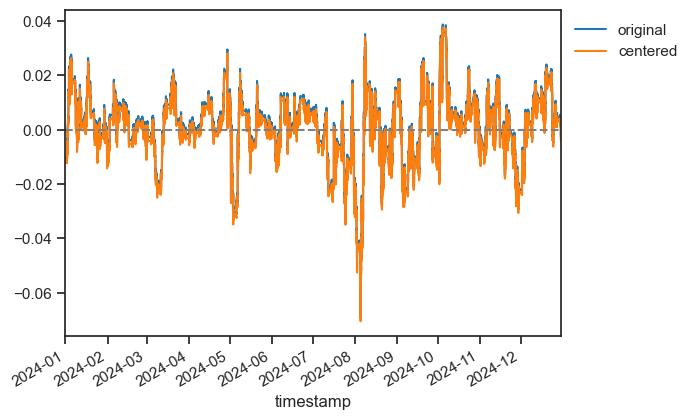

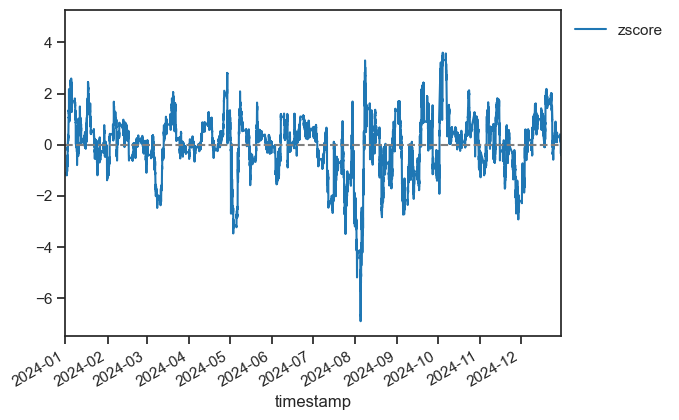

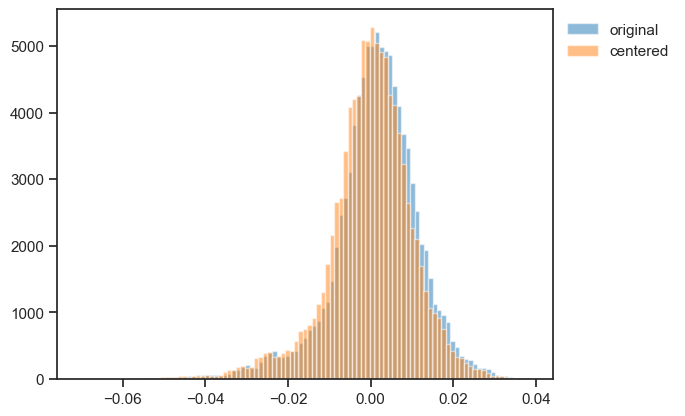

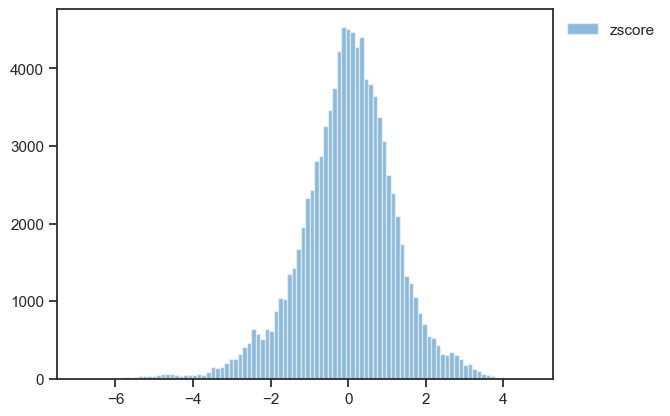

In [246]:
sample = df['close']
n=288
comparison = pd.concat([
    sample.pct_change(n).rename("original"),
    (sample.pct_change(n) - sample.pct_change(n).expanding().mean()).rename("centered"),
    ((sample.pct_change(n) - sample.pct_change(n).expanding().mean()) / sample.pct_change(n).expanding().std()).rename("zscore"),
], axis=1).dropna()

start_date = pd.Timestamp("2024-01-01")
end_date = pd.Timestamp("2024-12-31")

comparison["original"].plot()
comparison["centered"].plot()
plt.xlim(start_date, end_date)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), frameon=False)
plt.axhline(0, c="grey", ls="--")
plt.show()

comparison["zscore"].plot()
plt.xlim(start_date, end_date)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), frameon=False)
plt.axhline(0, c="grey", ls="--")
plt.show()

bins=100
plt.hist(comparison["original"], bins=bins, alpha=0.5, label="original")
plt.hist(comparison["centered"], bins=bins, alpha=0.5, label="centered")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), frameon=False)
plt.show()


plt.hist(comparison["zscore"], bins=bins, alpha=0.5, label="zscore")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), frameon=False)
plt.show()

In [247]:
n = 5
print(n)
n_barriers = 1
barrier = sample.pct_change(n).abs().quantile(0.3)  # approx. a 1σ interval, assuming normal distributed returns


5


In [248]:
barrier

np.float64(0.00027629113869178653)

,0%,10%,20%,30%,40%,50%,60%,70%,80%,90%,100%
close,-0.032745,-0.001215,-0.00065,-0.000343,-0.000135,0.000041,0.000218,0.000435,0.000738,0.00129,0.020196


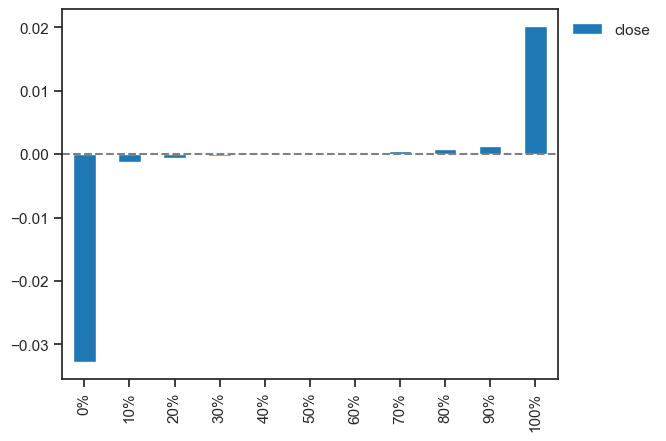

In [249]:
percentiles = sample.pct_change(n).describe(percentiles=np.linspace(0,1,11)).drop(["count", "mean", "std", "min", "max"])
display(percentiles.to_frame().T)
percentiles.plot.bar()
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), frameon=False)
plt.axhline(0, c="grey", ls="--")
plt.show()

In [252]:
rets = sample.pct_change()

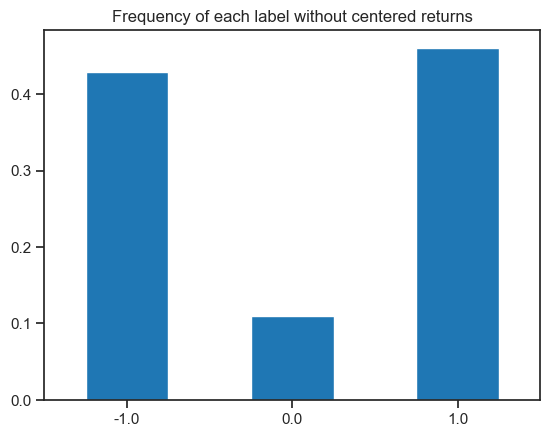

CPU times: user 2.62 s, sys: 138 ms, total: 2.75 s
Wall time: 2.64 s


In [251]:
%%time
barrier_method = BarrierMethod(returns=rets, n=n, barrier=barrier, n_barriers=n_barriers, center=False)
barrier_method.labels.value_counts(normalize=True).sort_index().plot.bar(rot=0, title="Frequency of each label without centered returns")
# plt.gcf().savefig("../figures/barrier_freq.png")
plt.show()

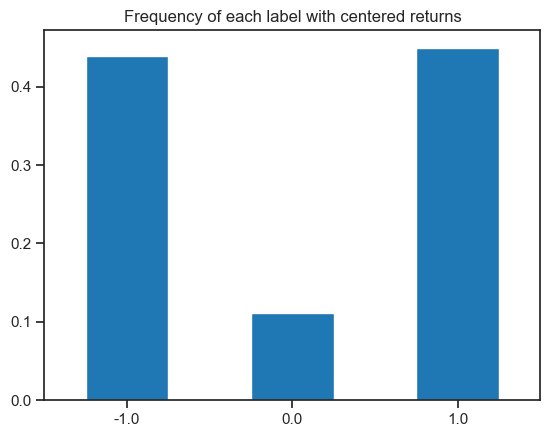

CPU times: user 2.67 s, sys: 142 ms, total: 2.82 s
Wall time: 2.79 s


In [253]:
%%time
barrier_method = BarrierMethod(returns=rets, n=n, barrier=barrier, n_barriers=n_barriers, center=True)
barrier_method.labels.value_counts(normalize=True).sort_index().plot.bar(rot=0, title="Frequency of each label with centered returns")
# plt.gcf().savefig("../figures/barrier_freq_centered.png")
plt.show()

In [254]:
barrier_method.labels.index

DatetimeIndex(['2021-01-15 14:15:00', '2021-01-15 14:30:00',
               '2021-01-15 14:45:00', '2021-01-15 15:00:00',
               '2021-01-15 15:15:00', '2021-01-15 15:30:00',
               '2021-01-15 15:45:00', '2021-01-15 16:00:00',
               '2021-01-15 16:15:00', '2021-01-15 16:30:00',
               ...
               '2024-12-30 21:30:00', '2024-12-30 21:45:00',
               '2024-12-30 22:00:00', '2024-12-30 22:15:00',
               '2024-12-30 22:30:00', '2024-12-30 22:45:00',
               '2024-12-30 23:00:00', '2024-12-30 23:15:00',
               '2024-12-30 23:30:00', '2024-12-30 23:45:00'],
              dtype='datetime64[ns]', name='timestamp', length=98795, freq=None)

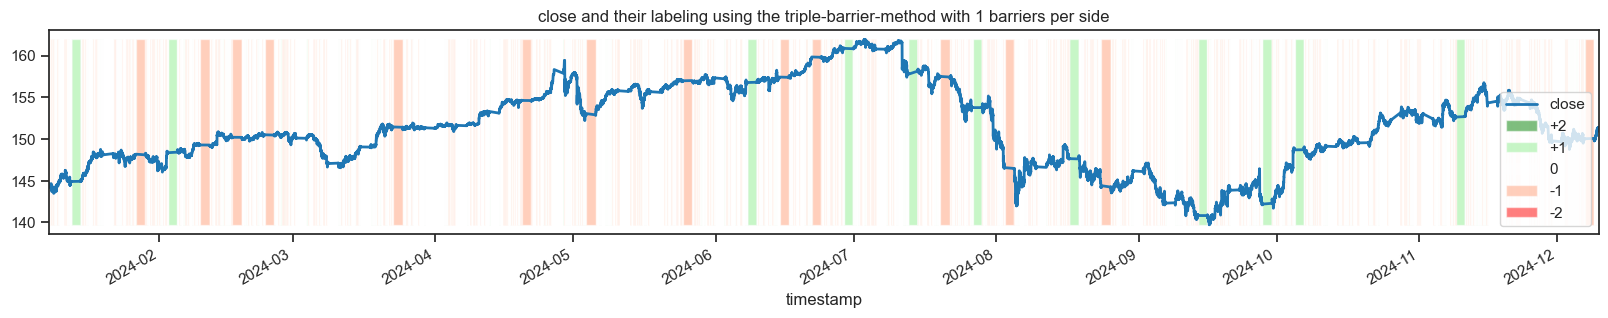

In [255]:
price_col = 'close'
start_date = pd.Timestamp("2024-01-08")
end_date = pd.Timestamp("2024-12-10")

labels = barrier_method.labels.rename("label")
idx = labels.index.intersection(sample.index)

plot_df = pd.concat([sample, labels], axis=1).loc[idx].dropna()
start_date, end_date = max(start_date, plot_df.index.min()), min(end_date, plot_df.index.max())
plot_df = plot_df.loc[start_date:end_date]
figsize = (20, 3)
fig, ax = plt.subplots(figsize=figsize)
ax.set_title(f"{price_col} and their labeling using the triple-barrier-method with {n_barriers} barriers per side")
plot_df[price_col].plot(ax=ax, linewidth=2)
ylim = (plot_df[price_col].min(), plot_df[price_col].max())

ax.fill_between(plot_df[price_col].index, ylim[0], ylim[1], where=plot_df["label"]==2,facecolor='green', alpha=0.5, label="+2")
ax.fill_between(plot_df[price_col].index, ylim[0], ylim[1], where=plot_df["label"]==1,facecolor='lightgreen', alpha=0.5, label="+1")
ax.fill_between(plot_df[price_col].index, ylim[0], ylim[1], where=plot_df["label"]==0,facecolor='white', alpha=0.5, label="0")
ax.fill_between(plot_df[price_col].index, ylim[0], ylim[1], where=plot_df["label"]==-1,facecolor='lightsalmon', alpha=0.5, label="-1")
ax.fill_between(plot_df[price_col].index, ylim[0], ylim[1], where=plot_df["label"]==-2,facecolor='red', alpha=0.5, label="-2")
ax.legend(loc="lower right")
ax.set_xlim(start_date, end_date)
plt.show()


2024-09-25 01:15:00 2024-09-25 06:15:00


/Users/yoyo/personal/fxml/fxml/data/labeling/barrier_method/barrier_method.py:325: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(


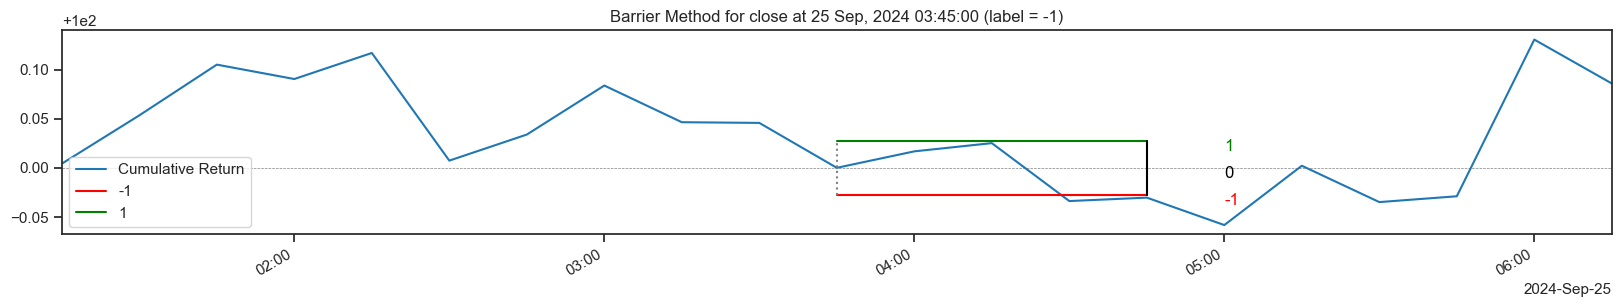

In [256]:

fig = barrier_method.plot_at_date("2024-09-25 03:45:00", offset=n*2, figsize=(20, 3))
plt.show()

In [257]:
barrier_method.transition_probabilities.style.format( "{:.1%}")

To,-1,0,1
From,,,
-1,66.5%,5.2%,28.3%
0,22.7%,56.6%,20.7%
1,27.2%,5.5%,67.3%


In [258]:
barrier_method.labels.value_counts()

 1.0    44431
-1.0    43445
 0.0    10914
Name: count, dtype: int64

In [259]:
df['label'] = barrier_method.labels

In [260]:
df.dropna(inplace=True)

In [261]:
df.to_pickle('../data/processed/USDJPY-15m-20210101-20241231_TBM_B6.pkl')

In [239]:
df['class'] = df['label'] + 1

In [240]:
df['class'].value_counts()

class
1.0    35988
0.0    31716
2.0    30971
Name: count, dtype: int64

In [241]:
train_data = df[df.index.year < 2024]
test_data = df[df.index.year >= 2024]


In [242]:
train_data.to_pickle('../data/processed/USDJPY-15m-20210101-20231231_TBM_B6.pkl')
test_data.to_pickle('../data/processed/USDJPY-15m-20240101-20241231_TBM_B6.pkl')
                